In [6]:
from simulation import Individual
import numpy as np
import matplotlib.pyplot as plt

In [9]:
"""
Using the example from the paper page 6 last paragraph and
first paragraph page 7
"""
strategyOne = np.array([[0.0,0.1,0.0], [0.2,0.1,0.5]])
strategyTwo = np.array([[0.1,0.5,0.1], [0.7,0.2,0.5]])
m = 2
omega = 2

In [10]:
individualOne = Individual(1, strategyOne, False)
individualTwo = Individual(1, strategyTwo, False)

In [11]:
individualOne

[Wealth = 1]
Strategy:
[[0.  0.1 0. ]
 [0.2 0.1 0.5]]

----------------------------------
# Reading .dat file
Reading out the .dat file

In [2]:
filename= "TestSimulation.dat"

In [3]:
def file_len(fname):
    """ Returns number of lines in the file
    """
    with open(fname) as f:
        for i, l in enumerate(f):
            pass
    return i + 1

file_len(filename)

10009

In [4]:
def readContributionFileToData(fileName, heterogeneous, rounds, linesHeader=7, linesSummary=2, numGenerations=None):
    """ Read the contributions per generation of a file
        
        Attributes:
            - fileName(str): String of the file name/path
            - heterogeneous(bool): Tells if the data is heterogeneous
            - rounds(int): Number of rounds
            - linesHeader(int): Number of header lines of the file
            - linesSummary(int): Number of summary lines at the end of the file.
            - numGenerations(int): Number of generations. Default is None, then it is manually calculated based on the file length
        
        Returns a multidimensional numpy array with the average contribution level:
            - (NumGen,rounds) in the case of homogeneous
            - (NumGen,2,rounds) in the heterogeneous where dimension 1 has is the health status.
    """
    lenfile = file_len(fileName)
    
    if heterogeneous:
        # Not implemented yet because the format of the heterogenous case might change.
        print("heterogeneous not implemented yet")
        
    else: # Is homogeneous. In this case the contributions are just individual 
        
        if numGenerations is None: # If number of generations not specified construct it from the file length
            numGenerations = lenfile - linesHeader - linesSummary
            
        # init contribution
        contribution = np.empty(shape=(numGenerations,rounds))
        
        with open(fileName) as file:
            for i, line in enumerate(file):
                if i < linesHeader:
                    continue
                if i >= lenfile - linesSummary:
                    continue
                contribution[i-linesHeader] = np.fromstring(line,sep=" ")
                
        return contribution

contributionArray = readContributionFileToData(filename,False,4)

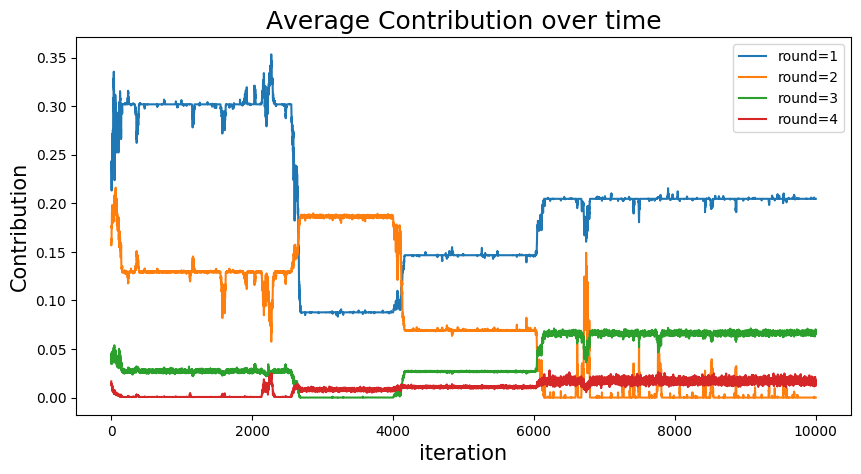

In [5]:
def plotContributionVsGeneration(contributionArray):
    rounds = contributionArray.shape[-1]
    fig = plt.figure(figsize=(10,5),dpi=100)
    for r in range(0,rounds):
        plt.plot(contributionArray[:,r],label=f"round={r+1}")
    
    plt.xlabel("iteration",fontsize=15)
    plt.ylabel("Contribution",fontsize=15)
    plt.title("Average Contribution over time",fontsize=18)
    plt.legend()
    #plt.savefig("Contribution")
    
plotContributionVsGeneration(contributionArray)